In [1]:
%load_ext autoreload

%autoreload 2

from pprint import pprint
import numpy as np
from lucifex.fdm import FunctionSeries, GridSeries, ConstantSeries, NumericSeries
from lucifex.io import (find_datasets, DataSet, find_by_parameters, proxy, load_grid_series, 
    load_numeric_series, load_mesh, load_function_series, load_txt_dict)
from lucifex.viz import plot_line, plot_colormap
from lucifex.utils import nested_dict, as_index
from crocodil.post.plot import (
    plot_colormaps, plot_timeseries,
    plot_twinned_timeseries, plot_colormaps_multifigure,
)
from crocodil.post.array_utils import spatial_average, time_average

ROOT = './data_reference/'
PARAMETERS = 'PARAMETERS.txt'
FUNCTION_SERIES = 'FunctionSeries.h5'
CONSTANT_SERIES = 'ConstantSeries.h5'
GRID_SERIES = 'GridSeries.npz' 
NUMERIC_SERIES = 'NumericSeries.npz'
FIGURES = 'figures'

datasets = find_datasets(
    ROOT, 
    *[(i, GridSeries, GRID_SERIES) for i in ('c', 's', 'psi')],
    *[(i, NumericSeries, NUMERIC_SERIES) for i in ('mD', 'mC', 'f', 'uMinMax', 'dt', 'sMinMax', 'cMinMax')],
    exclude='archive*',
    parameter_file=PARAMETERS,
)

# Nx200_data = find_by_parameters(datasets, {'Nx': 200})
# # Nx250_dataset = find_by_parameters(datasets, {'Nx': 250})
# Nx250_data = datasets[-1]

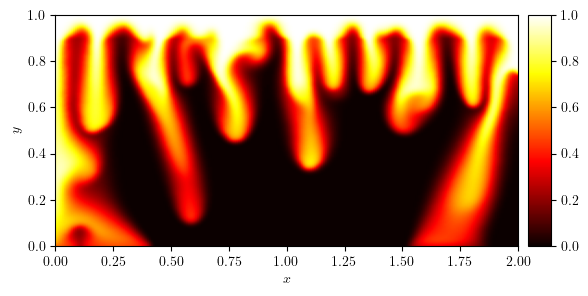

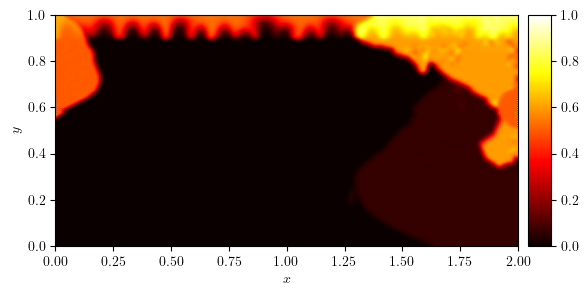

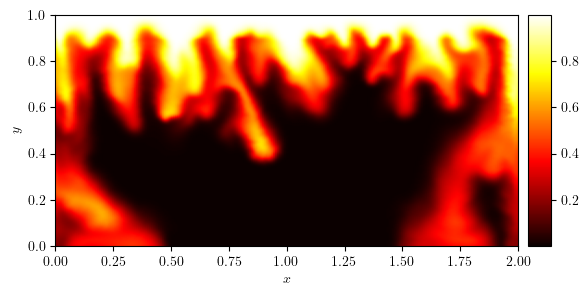

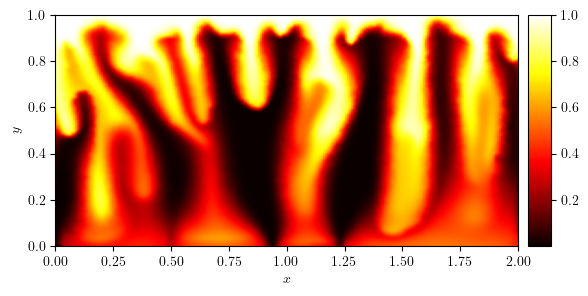

: 

In [ ]:
t_target = 8.0

for dset in datasets:
    c = dset['c']
    index = as_index(c.time_series, t_target)
    plot_colormap((*c.axes, c.series[index]))

In [ ]:
[dset.add_metadata(function_series_metadata=[('cCorr', FUNCTION_SERIES, )]) for dset in datasets]

for dset in datasets:
    cCorr = dset['cCorr']

In [ ]:
for dset in datasets[:1]:
    dset['fInterface', 'fPlus', 'fMinus', 'fMid'] = dset['f'].split()
    dset['fInterfaceNet'] = dset['fInterface'].transform(lambda i: i[0] - i[1], name='fInterfaceNet')
    # dset['uMin', 'uMax'] = dset['uMinMax'].split()
    # dset['sMin', 'sMax'] = dset['sMinMax'].split()
    # dset['cMin', 'cMax'] = dset['cMinMax'].split()

In [ ]:
plot_line((dset['fInterfaceNet'].time_series, dset['fInterfaceNet'].series), x_lims=(0,16))

In [ ]:
plot_line(
    [(Nx200_data['fMid'].time_series, [i[1] for i in Nx200_data['fMid'].series]), 
     (Nx250_data['fMid'].time_series, [i[1] for i in Nx250_data['fMid'].series])],
    x_lims=(0, 16),
)

In [ ]:
plot_line(
    [(Nx200_data['fMinus'].time_series, [i[0] - i[1] for i in Nx200_data['fMinus'].series]), 
     (Nx250_data['fMinus'].time_series, [i[0] - i[1] for i in Nx250_data['fMinus'].series])],
    x_lims=(0, 16),
)

In [ ]:
fInterfaceSum_200 = [(i[0] - i[1])/2 for i in Nx200_data['fInterface'].series]
fInterfaceSum_250 = [(i[0] - i[1]) for i in Nx250_data['fInterface'].series]

plot_line(
    [(
        Nx200_data['fInterface'].time_series, 
        time_average(fInterfaceSum_200, 0.1, Nx200_data['fInterface'].time_series)), 
     (
        Nx250_data['fInterface'].time_series, 
        time_average(fInterfaceSum_250, 0.2, Nx250_data['fInterface'].time_series)), 
    ],
    x_lims=(0, 16),
    y_lims=(0, -0.1),
)

# fInterfaceSum = [(i[0] - i[1])/2 for i in Nx200_data['fInterface'].series]

# ax.plot(Nx200_data['fInterface'].time_series, moving_average(fInterfaceSum, 10))

In [ ]:
plot_line(
    [(Nx200_data['fInterface'].time_series, [(i[0] - i[1])/2 for i in Nx200_data['fInterface'].series]), 
     (Nx250_data['fInterface'].time_series, [i[0] - i[1] for i in Nx250_data['fInterface'].series])],
    x_lims=(0, 16),
    y_lims=(0, -0.1),
)

In [ ]:
plot_line(
    [(Nx200_data['mD'].time_series, Nx200_data['mD'].series),
     (Nx250_data['mD'].time_series, Nx250_data['mD'].series)],
     x_lims=(0, 16),
)

In [ ]:
plot_line(
    [(Nx200_data['mC'].time_series, Nx200_data['mC'].series),
     (Nx250_data['mC'].time_series, Nx250_data['mC'].series)],
     x_lims=(0, 16),
)

In [ ]:
plot_line(
    [(Nx200_data['uMax'].time_series, Nx200_data['uMax'].series),
     (Nx250_data['uMax'].time_series, Nx250_data['uMax'].series)], 
    x_lims=(0, 16),
    y_lims=(0, 2),
)

In [ ]:
plot_line(
    [(Nx200_data['mD'].time_series, [i + j for i, j in zip(Nx200_data['mD'].series, Nx200_data['mC'].series)]),
     (Nx250_data['mD'].time_series, [i + j for i, j in zip(Nx250_data['mD'].series, Nx250_data['mC'].series)])],
     x_lims=(0,16),
)

In [ ]:
plot_line(
    [(Nx200_data['c'].time_series, [np.mean(i) for i in Nx200_data['c'].series]),
     (Nx250_data['c'].time_series, [np.mean(i) for i in Nx250_data['c'].series])],
     x_lims=(0,16),
    )

In [ ]:
t_target = 8.1

series_index = as_index(Nx200_data['c'].time_series, t_target) 


plot_line(
    (Nx200_data['c'].axes[0], Nx200_data['c'].series[series_index][:, 140]),
)

In [ ]:
t_target = 8.1

series_index = as_index(Nx200_data['c'].time_series, t_target) 
plot_colormap(
    (*Nx200_data['c'].axes, Nx200_data['c'].series[series_index]),
    title=f"$c(t={Nx200_data['c'].time_series[series_index]})$",
    )

series_index = as_index(Nx250_data['c'].time_series, t_target) 
plot_colormap(
    (*Nx250_data['c'].axes, Nx250_data['c'].series[series_index]),
    title=f"$c(t={Nx250_data['c'].time_series[series_index]})$",
    )

In [ ]:
max(Nx200_data['dt'].series)

In [ ]:
max(Nx250_data['dt'].series)

In [ ]:
t_target = 9.2
series_index = as_index(Nx250_data['s'].time_series, t_target)

plot_colormap(
    (*Nx250_data['s'].axes, Nx250_data['s'].series[series_index]),
    title=f"$s(t={Nx250_data['s'].time_series[series_index]})$",
    )

In [ ]:
plot_line((Nx200_data['dt'].time_series, Nx200_data['dt'].series), x_lims=(0, 20))
plot_line((Nx250_data['dt'].time_series, Nx250_data['dt'].series), x_lims=(0, 20))